# Visualization of CNN to Correlate Company Reseach Report with Stock Price

# Importing all dependencies

In [1]:
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from visualizations import load_trained_model, show_net_weights

# Set default size of plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# Load model

In [2]:
# Load model
model = load_trained_model('best_model.h5')

# Architecture of CNN
As shown in figure below, the CNN contains 4 layers with trainable weights, the first two are convolutional layers while the   third   and   fourth   are   fully   connected   and   softmax   layers   respectively.

The first convolutional layer filters the 386×15×15 input matrix with 8 kernels of size 2×2×1 and a stride of 1. Its output is filtered by the second convolutional layer in the same way. The kernels of the second convolutional layer are connected to all kernel maps in the first layer, and both convolutional layers are followed by a 2×2 max pooling layer. The output of the second convolutional layer is then flattened into a 1D vector, fed into a fully connected layer with 4 neurons, and finally passed into the softmax layer producing a distribution over the 3 class labels. ReLU non-linearity

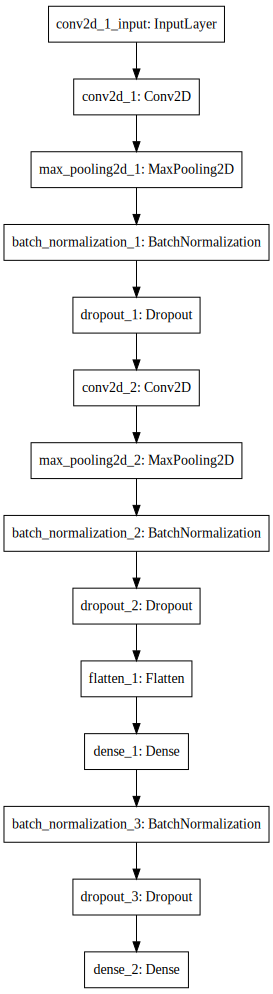

In [3]:
# Display architecture of current model
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [4]:
# Display model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 4, 8)          40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 3, 8)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 3, 8)          32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 3, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 2, 8)          264       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 1, 8)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 1, 8)          32        
__________

# Visualize the weights of fully connected layer
Figure belows shows the visualization of weights learned in fully connected layer. The weights learned are between -1 and
1,   and   the   brighter   it   is,   the   larger   it   is.   Different   colors   represent   weights   learned   in   different   dimension.

Since the input of our model is not images, it is generally difficult to interpret the weights learned. However, we can observe that the grids on the bottom half appear to be less ‘polar’ or less ‘extreme’, and the their brightness are generally close to middle level, indicating the weights learned are closer to zero. This is because the average number of reports of target company every month is around 3 ~ 4, but as mentioned in 6.1, we padded the sequences to length of 15 with zeros. This means that our model has successfully learnt that the padded zeros have no significant relationship with the output. On the other hand, we noticed that the visualized weights on the top half appear to be very bright or very dark, indicating weights with large magnitudes. This implies that our model has succeeded in learning   several   important   features   from   the   reports   of   each   month   that   could   be   correlated   with   the   output   labels.

In [5]:
# Get weights for fully connected layer
layer_dict = dict([(layer.name, layer) for layer in model.layers])
weights = layer_dict['dense_1'].get_weights() # list of numpy arrays

W, b = weights[0], weights[1]

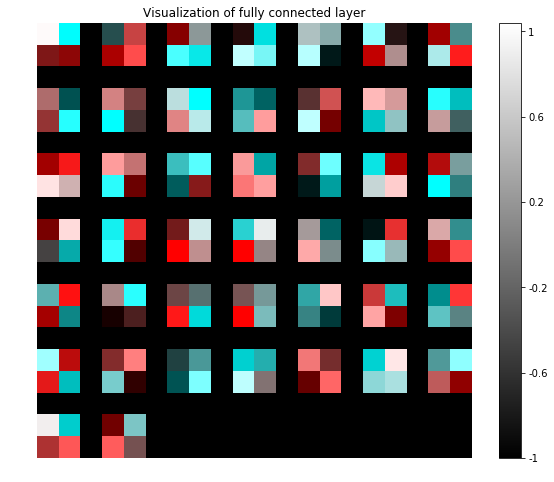

In [6]:
# Visualize the weights
show_net_weights(W) 